<a href="https://colab.research.google.com/github/ezequiasOR/ia-ufcg/blob/master/QD2_questao3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 8.6 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=2d4465e4641257a987649d95599878adf6b58ee2e6cf0ec7d54afc179b6d5e08
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

velocidade_regulamentada = 100    # em km/h
cinquenta_vr = velocidade_regulamentada * 0.5
setenta_vr = velocidade_regulamentada * 0.7
oitenta_vr = velocidade_regulamentada * 0.8
cento_dez_vr = velocidade_regulamentada * 1.1
cento_vinte_vr = velocidade_regulamentada * 1.2
duzentos_vr = velocidade_regulamentada * 2

# variáveis do problema
velocidade = ctrl.Antecedent(np.arange(0, duzentos_vr, 1), 'velocidade')
multa = ctrl.Consequent(np.arange(0, 2000, 1), 'multa')


velocidade['nao-normal-left'] = fuzz.trapmf(velocidade.universe, [0, 0, setenta_vr, setenta_vr])
velocidade['nao-normal-right'] = fuzz.trapmf(velocidade.universe, [cento_vinte_vr, cento_vinte_vr, duzentos_vr, duzentos_vr])
velocidade['baixa'] = fuzz.trapmf(velocidade.universe, [0, 0, cinquenta_vr, oitenta_vr])
velocidade['normal'] = fuzz.trapmf(velocidade.universe, [setenta_vr, oitenta_vr, cento_dez_vr, cento_vinte_vr])
velocidade['alta'] = fuzz.trapmf(velocidade.universe, [velocidade_regulamentada, cento_vinte_vr, duzentos_vr, duzentos_vr])


multa['nula'] = fuzz.trimf(multa.universe, [0, 0, 0])
multa['media'] = fuzz.trapmf(multa.universe, [100, 200, 700, 900])
multa['severa'] = fuzz.trapmf(multa.universe, [500, 1500, 2000, 2000])

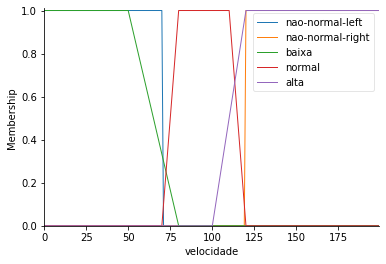

In [ ]:
velocidade.view()

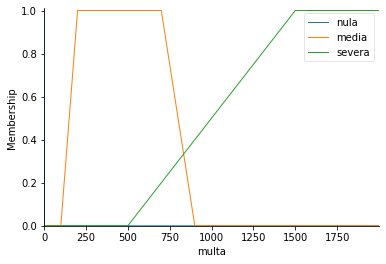

In [ ]:
multa.view()

In [ ]:
# rule1 = ctrl.Rule(velocidade['baixa'] & ~velocidade['normal'], multa['media'])
# rule2 = ctrl.Rule(velocidade['normal'], multa['nula'])
# rule3 = ctrl.Rule(velocidade['alta'] & ~velocidade['normal'] , multa['severa'])


rule1 = ctrl.Rule(velocidade['baixa'] & velocidade['nao-normal-left'], multa['media'])
rule2 = ctrl.Rule(velocidade['normal'], multa['nula'])
rule3 = ctrl.Rule(velocidade['alta'] & velocidade['nao-normal-right'], multa['severa'])

print(rule1)
print(rule2)
print(rule3)

IF velocidade[baixa] AND velocidade[nao-normal-left] THEN multa[media]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF velocidade[normal] THEN multa[nula]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF velocidade[alta] AND velocidade[nao-normal-right] THEN multa[severa]
	AND aggregation function : fmin
	OR aggregation function  : fmax


In [ ]:
multando_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
# multando_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])

In [ ]:
multando = ctrl.ControlSystemSimulation(multando_ctrl)

# Testes
## Velocidade baixa
Velocidade de 45km/h (abaixo de 50% da velocidade regulamentada na via):

476.92307692307566


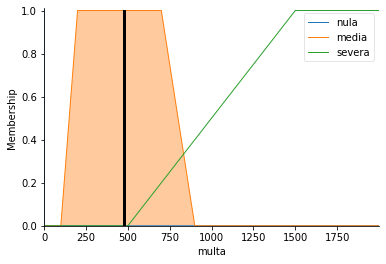

In [ ]:
multando.input['velocidade'] = 45

multando.compute()

print(multando.output['multa'])
multa.view(sim=multando)

## Velocidade baixa e normal
Velocidade de 75km/h (entre 70% e 80% da velocidade regulamentada na via):

0.38888888888888884


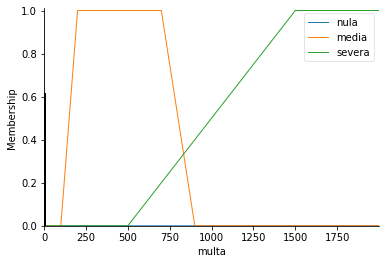

In [ ]:
multando.input['velocidade'] = 75

multando.compute()

print(multando.output['multa'])
multa.view(sim=multando)

## Velocidade normal
Velocidade de 100km/h (entre 80% e 110% da velocidade regulamentada na via):

0.3333333333333333


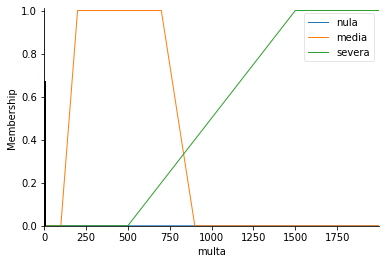

In [ ]:
multando.input['velocidade'] = 100

multando.compute()

print(multando.output['multa'])
multa.view(sim=multando)

## Velocidade normal e alta
Velocidade de 115km/h (entre 110% e 120% da velocidade regulamentada na via):

0.3888888888888888


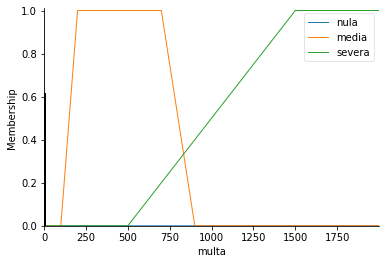

In [ ]:
multando.input['velocidade'] = 115

multando.compute()

print(multando.output['multa'])
multa.view(sim=multando)

## Velocidade alta
Velocidade de 125km/h (acima de 120% da velocidade regulamentada na via):

1457.7916249582913


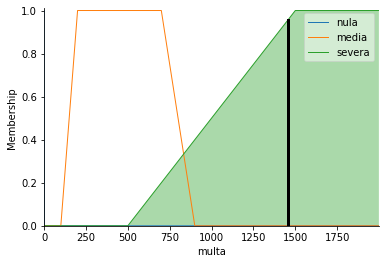

In [ ]:
multando.input['velocidade'] = 125

multando.compute()

print(multando.output['multa'])
multa.view(sim=multando)

# Segunda opção

#### Definição da velocidade regulamentada na via e de algumas porcentagens

In [ ]:
velocidade_regulamentada = 100    # em km/h
cinquenta_vr = velocidade_regulamentada * 0.5
setenta_vr = velocidade_regulamentada * 0.7
oitenta_vr = velocidade_regulamentada * 0.8
cento_dez_vr = velocidade_regulamentada * 1.1
cento_vinte_vr = velocidade_regulamentada * 1.2
duzentos_vr = velocidade_regulamentada * 2

#### Definição das funções de pertinência nebulosa de entrada e de saída

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


velocidade_alta = ctrl.Antecedent(np.arange(0, duzentos_vr, 1), 'velocidade_alta')
velocidade_normal = ctrl.Antecedent(np.arange(0, duzentos_vr, 1), 'velocidade_normal')
velocidade_baixa = ctrl.Antecedent(np.arange(0, duzentos_vr, 1), 'velocidade_baixa')
multa = ctrl.Consequent(np.arange(0, 2000, 1), 'multa')


velocidade_baixa['baixa'] = fuzz.trapmf(velocidade_baixa.universe, [0, 0, cinquenta_vr, oitenta_vr])
velocidade_baixa['nula'] = fuzz.trapmf(velocidade_baixa.universe, [oitenta_vr, oitenta_vr, duzentos_vr, duzentos_vr])


velocidade_normal['normal'] = fuzz.trapmf(velocidade_normal.universe, [setenta_vr, oitenta_vr, cento_dez_vr, cento_vinte_vr])
velocidade_normal['nula_e'] = fuzz.trapmf(velocidade_normal.universe, [0, 0, setenta_vr, setenta_vr])
velocidade_normal['nula_d'] = fuzz.trapmf(velocidade_normal.universe, [cento_vinte_vr, cento_vinte_vr, duzentos_vr, duzentos_vr])


velocidade_alta['alta'] = fuzz.trapmf(velocidade_alta.universe, [velocidade_regulamentada, cento_vinte_vr, duzentos_vr, duzentos_vr])
velocidade_alta['nula'] = fuzz.trapmf(velocidade_alta.universe, [0, 0, velocidade_regulamentada, velocidade_regulamentada])


multa['nula'] = fuzz.trimf(multa.universe, [0, 0, 0])
multa['media'] = fuzz.trapmf(multa.universe, [100, 200, 700, 900])
multa['severa'] = fuzz.trapmf(multa.universe, [500, 1500, 2000, 2000])

### Gráficos:

### Velocidade alta:
A velocidade do veículo está na classe ‘alta’ quando estiver acima de 120% da velocidade regulamentada da via e vai deixando (linearmente) de ser ‘alta’ à medida que se aproxima de 100%, desse patamar para baixo a velocidade perde totalmente a pertinência à classe ‘alta’.

> O eixo x representa a velocidade em km/h e o eixo y o nível de pertinência da velocidade à classe 'alta'.

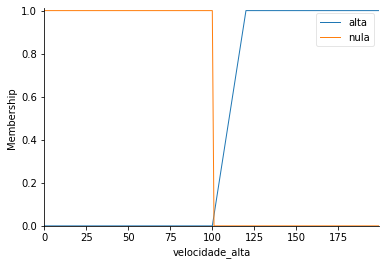

In [ ]:
velocidade_alta.view()

### Velocidade normal:
A velocidade pertence a classe 'noraml' quando estiver entre 80 e 110% da velocidade regulamentada da via, mas vai deixando de ser ‘normal’ à medida que se aproxima de 120%, atingindo pertinência nula à classe ‘normal’ após esse patamar. Da mesmo forma, a velocidade perderá linearmente pertinência à classe ‘normal’ quando apresentar velocidades menores que 80% da regulamentar, atingindo pertinência nula à classe ‘normal’ quando assumir valores menores que 70%.

> O eixo x representa a velocidade em km/h e o eixo y o nível de pertinência da velocidade à classe 'normal'.

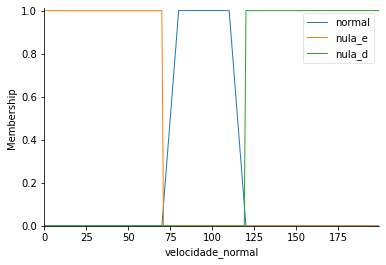

In [ ]:
velocidade_normal.view()

### Velocidade baixa:
A velocidade pertence a classe ‘baixa’ quando for menor que 50% da velocidade regulamentada da via, mas vai deixando de ser ‘baixa’ à medida que se aproxima de 80%, atingindo pertinência nula à classe ‘baixa’ após esse patamar.

> O eixo x representa a velocidade em km/h e o eixo y o nível de pertinência da velocidade à classe 'baixa'.

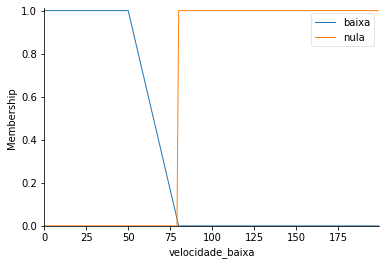

In [ ]:
velocidade_baixa.view()

### Multa
- Uma multa pertence a classe ‘severa’ se for maior que R$1.500 e perderá linearmente pertinência à classe ‘severa’ à medida que se aproxima de 500 reais, tendo pertinência nula desse valor para baixo.

- Uma multa é definitivamente ‘média’ se estiver entre R$200 e 700 reais, mas perde linearmente pertinência à classe ‘média’ quando se afasta de 200 reais na direção de 100 reais (sendo este o ponto de menor pertinência) ou quando se afasta de 700 reais na direção de 900 reais (sendo este o outro ponto de  menor pertinência).

- Uma multa é definitivamente ‘nula’ se for exatamente igual a R$0 (zero), com certeza será não-‘nula’ para quaisquer outros valores.

> O eixo x representa o valor da multa em reais e o eixo y o nível de pertinência da multa às classe 'severa', 'média' e 'nula'.


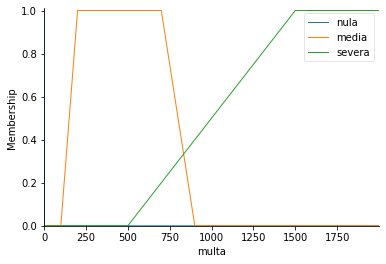

In [ ]:
multa.view()

In [ ]:
rule1 = ctrl.Rule(velocidade_baixa['baixa'] & (velocidade_normal['nula_e'] | velocidade_normal['nula_d']), multa['media']) # velocidade baixa e não-normal
rule2 = ctrl.Rule(velocidade_normal['normal'], multa['nula']) # velocidade normal
rule3 = ctrl.Rule(velocidade_alta['alta'] & (velocidade_normal['nula_e'] | velocidade_normal['nula_d']), multa['severa']) # velocidade alta e não-normal

print(rule1)
print(rule2)
print(rule3)

IF velocidade_baixa[baixa] AND (velocidade_normal[nula_e] OR velocidade_normal[nula_d]) THEN multa[media]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF velocidade_normal[normal] THEN multa[nula]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF velocidade_alta[alta] AND (velocidade_normal[nula_e] OR velocidade_normal[nula_d]) THEN multa[severa]
	AND aggregation function : fmin
	OR aggregation function  : fmax


In [ ]:
multando_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
multando = ctrl.ControlSystemSimulation(multando_ctrl)

In [ ]:
def set_velocidade(v):
    multando.input['velocidade_alta'] = v
    multando.input['velocidade_normal'] = v
    multando.input['velocidade_baixa'] = v

# Testes
## Velocidade baixa
Velocidade de 45km/h (abaixo de 50% da velocidade regulamentada na via):

476.92307692307566


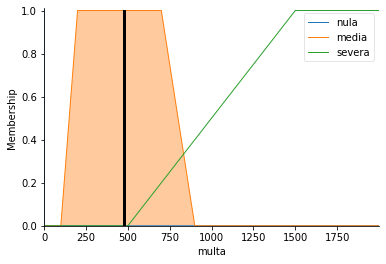

In [ ]:
set_velocidade(45)

multando.compute()

print(multando.output['multa'])
multa.view(sim=multando)

## Velocidade baixa e normal
Velocidade de 75km/h (entre 70% e 80% da velocidade regulamentada na via):

0.38888888888888884


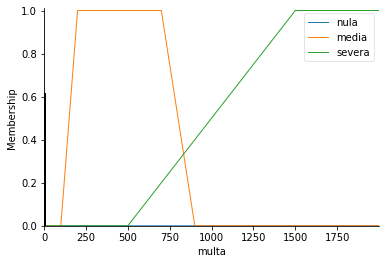

In [ ]:
set_velocidade(75)

multando.compute()

print(multando.output['multa'])
multa.view(sim=multando)

## Velocidade normal
Velocidade de 100km/h (entre 80% e 110% da velocidade regulamentada na via):

0.3333333333333333


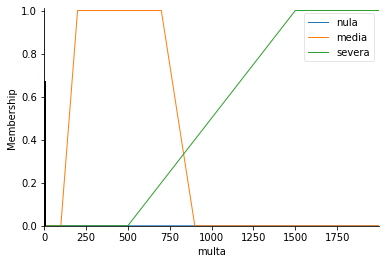

In [ ]:
set_velocidade(100)

multando.compute()

print(multando.output['multa'])
multa.view(sim=multando)

## Velocidade normal e alta
Velocidade de 115km/h (entre 110% e 120% da velocidade regulamentada na via):

0.3888888888888888


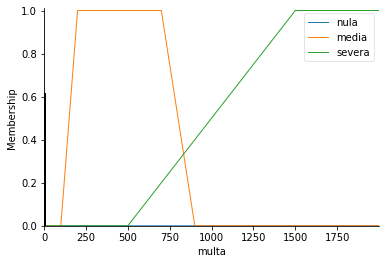

In [ ]:
set_velocidade(115)

multando.compute()

print(multando.output['multa'])
multa.view(sim=multando)

## Velocidade alta
Velocidade de 125km/h (acima de 120% da velocidade regulamentada na via):

1457.7916249582913


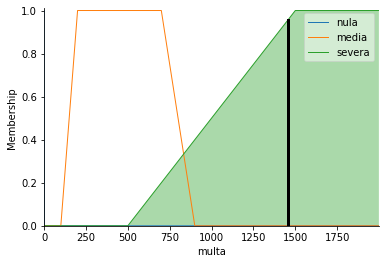

In [ ]:
set_velocidade(125)

multando.compute()

print(multando.output['multa'])
multa.view(sim=multando)